In [1]:
import numpy as np 
import pandas as pd
import requests
from groq import Groq
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import math

In [2]:
keyCalls = 0
currentKey =2

In [5]:
contracts = pd.read_csv("data/contracts_data.csv")
contracts_test = contracts[contracts["Start Date"].str.match(r"^\d{4}-\d{2}-\d{2}$", na=False)]
contracts_test["Start Date"] = pd.to_datetime(contracts_test["Start Date"])
contracts_test = contracts_test.sort_values(by="Start Date")

/tmp/ipykernel_55845/70418442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contracts_test["Start Date"] = pd.to_datetime(contracts_test["Start Date"])


In [6]:
client = Groq(api_key="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")

In [7]:
def getTicker(company): 
    completion = client.chat.completions.create(
        model="gemma2-9b-it",
        messages=[
            {
                "role": "system",
                "content": "Identify publicly traded companies that have a positive correlation with a given company. consider other companies that would benefit from this company thriving, while excluding direct competitors who might not experience the same positive effect. Also, provide any parent or subsidiary companies that are publicly traded, including the company itself if applicable. \n\n# Required Information:\n- Given company name.\n\n# Details to Include:\n- List companies that have a positive correlation with the given company if it receives a large (>100M USD) government contract.\n- Include companies positively influenced by this event or that have a linked dependency, excluding direct competitors as they might not benefit under the same conditions.\n- Include parent or subsidiary companies of the given company, if they are publicly traded.\n- Include the given company itself if it is publicly traded.\n\n# Output Format:\n\nProvide a list ordered by correlation to the given company separated by a comma of their TICKERS ONLY. do not include further information or notes. Return N/A if the company is not publicly traded.\n\n[TICKER]\n\n"
            }, 
            {
                "role": "user",
                "content": f"is {company}"
            },
        ],
        temperature=1.12,
        max_tokens=1024,
        top_p=1,
        stream=True,
        stop=None,
    )

    full_response = ""
    for chunk in completion:
        if chunk.choices[0].delta and chunk.choices[0].delta.content:
            full_response+=(chunk.choices[0].delta.content)
    return full_response

In [8]:
filtered_df = contracts_test[
    (contracts_test["Start Date"] >= pd.Timestamp("2013-01-01")) & 
    (contracts_test["Start Date"] <= pd.Timestamp("2018-12-31"))
]
filtered_df

,internal_id,Award ID,Recipient Name,Award Amount,Total Outlays,Description,Contract Award Type,def_codes,COVID-19 Obligations,COVID-19 Outlays,...,Infrastructure Outlays,Awarding Agency,Awarding Sub Agency,Start Date,End Date,recipient_id,prime_award_recipient_id,awarding_agency_id,agency_slug,generated_internal_id
13724,24127666,HSCGG313JPWX002,GUIDEHOUSE DIGITAL LLC,60938643.24,NaN,IGF::OT::IGF CORE TECHNOLOGIES CONTRACT (CTS)...,DELIVERY ORDER,NaN,NaN,NaN,...,NaN,Department of Homeland Security,U.S. Coast Guard,2013-01-01,2015-05-31,7d6153d4-4d5e-6de7-cd4c-10cd4c355b26-C,NaN,766.0,department-of-homeland-security,CONT_AWD_HSCGG313JPWX002_7008_HSCGG311DPWV888_...
7585,32317,0001,NAVIENT CORPORATION,108025412.48,NaN,IGF::CT::IGF CRITICAL FUNCTION - TASK ORDER 00...,DO,NaN,NaN,NaN,...,NaN,Department of Education,Department of Education,2013-01-01,2013-12-31,07e205be-1b21-4087-dd68-85104a375988-C,NaN,1068,department-of-education,CONT_AWD_0001_9100_EDFSA09D0015_9100
22090,146385,0001,RAYTHEON COMPANY,39278446.38,NaN,PERFORMANCE BASED LOGISTICS SUPPORT,DELIVERY ORDER,NaN,NaN,NaN,...,NaN,Department of Defense,Department of the Army,2013-01-01,2017-06-30,cce9df51-3950-87f4-0b34-4353d5a08f32-C,NaN,1173,department-of-defense,CONT_AWD_0001_9700_W31P4Q13D0001_9700
8655,37475216,W58RGZ13C0028,LONGBOW LLC,94359613.0,NaN,IGF::OT::IGF AWARD OF UNDEFINITIZED CONTRACT A...,DEFINITIVE CONTRACT,NaN,NaN,NaN,...,NaN,Department of Defense,Department of the Army,2013-01-01,2016-12-31,7f7a8f41-f3ed-2a27-60a1-463193891c6c-C,NaN,1173,department-of-defense,CONT_AWD_W58RGZ13C0028_9700_-NONE-_-NONE-
5974,676579,0006,GENERAL ELECTRIC COMPANY,138038498.13,NaN,EXERCISING ORDERING PERIOD 2 OF THE GE/CCAD PA...,DO,NaN,NaN,NaN,...,NaN,Department of Defense,Department of the Army,2013-01-01,2013-12-31,61dfb4da-ba2f-398f-13e9-5792607bf051-C,NaN,1173,department-of-defense,CONT_AWD_0006_9700_W58RGZ12D0015_9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11748,79375674,HT940219F0004,WISCONSIN PHYSICIANS SERVICE INSURANCE CORP.,71026330.81,NaN,TRICARE DUAL-ELIGIBLE FISCAL INTERMEDIARY CONT...,DELIVERY ORDER,NaN,NaN,NaN,...,NaN,Department of Defense,Defense Health Agency,2018-12-31,2021-06-30,54204e8f-2291-76fb-a803-7f5a2ca609f2-C,NaN,1173,department-of-defense,CONT_AWD_HT940219F0004_9700_HT940214D0003_9700
16982,76588087,75FCMC19F0012,EXECUTIVE INFORMATION SYSTEMS LLC,49633768.04,202009.54,IGF::OT::IGF SAS SOFTWARE ENTERPRISE LICENSE A...,DELIVERY ORDER,['Q'],NaN,NaN,...,NaN,Department of Health and Human Services,Centers for Medicare and Medicaid Services,2018-12-31,2021-12-30,589f33bf-0a5c-824b-5e51-d1c6cb930fb5-C,NaN,806,department-of-health-and-human-services,CONT_AWD_75FCMC19F0012_7530_47QTCA18D0081_4732
951,66860595,89243318CFE000003,"LEIDOS, INC.",754737489.0,488042728.78,RESEARCH SUPPORT SERVICES (RSS),DEFINITIVE CONTRACT,"['N', 'Q', 'Z']",70378.0,70244.04,...,17751334.87,Department of Energy,Department of Energy,2018-12-31,2025-12-30,32109085-1976-8da6-d5cd-7c8077389b75-C,NaN,930,department-of-energy,CONT_AWD_89243318CFE000003_8900_-NONE-_-NONE-
3841,76662198,75FCMC19F0015,FOUR LLC,211548701.0,55095531.37,IGF::OT::IGF INTERNATIONAL BUSINESS MACHINES C...,DELIVERY ORDER,['Q'],NaN,NaN,...,NaN,Department of Health and Human Services,Centers for Medicare and Medicaid Services,2018-12-31,2023-12-30,c07a6919-cdf9-7d1f-a566-40a65f12479b-C,NaN,806,department-of-health-and-human-services,CONT_AWD_75FCMC19F0015_7530_GS35F0312U_4730


In [9]:

indexKey = {
    '0': 'V9OIJQ16HHDKVYOJ', 
    '1': 'A75JKLMQIWJKIY96', 
    '2': 'DXCT5GK8UFM8ZU02', 
    '3': 'OTDYJFDQMVUT09AD', 
    '4': '6U29R2IASU2ZDQ9N', 
    '5': '9O5Y94NK5A05ML70',
    '6': 'B4FG1SX0A9DO3BHE', 
    '7': 'P5O52XFHHMN951JD', 
    '8' : '3EFJOOTTAELCYY2S', 
    '9': 'Q2YT6F4TZV0ZYMLA', 
    '10': 'KDTHAW0LWKGDAM3P',
    '11':'UURKCYGN6GJ5M1U7', 
    '12': "DYMR6CLGGG8DY757", 
    '13': '4MHQKYN6HGMA4BV3', 
    '14': '9DR1N10MELFXQS5W', 
    '15': '0D1JR0X3U38LNAYO', 
    '16': 'AAUJB67LMZ7EO4DX',
}


In [17]:
alphV = "https://www.alphavantage.co/query"

In [10]:
def setParams(ticker, itv, date):
    key = f'{currentKey}'
    params = {
        "function": "TIME_SERIES_INTRADAY", 
        "symbol" : ticker, 
        "interval" : itv, 
        "adjusted" : "false", 
        "month" : date, 
        "outputsize":"full", 
        "datatype" : "json", 
        "extended_hours": "false",
        "apikey": indexKey[key]
    }
    return params 

In [11]:
def getHistoric(tik, interval, month): 
    global keyCalls, currentKey
    historic = requests.get(alphV, params=setParams(tik, interval, month))
    keyCalls+=1 
    if keyCalls>25: 
        currentKey+=1
    key = f"Time Series ({interval})"
    df = pd.DataFrame.from_dict(historic.json()[key]).transpose().reset_index().rename(columns={'index':'date'})
    df.columns = df.columns.str.replace(r'^\d+\.\s*', '', regex=True)
    df['date'] = pd.to_datetime(df['date'])
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    return df.sort_values(by='date', ascending= True).reset_index(drop=True)

In [12]:
def getData(tik, interval, contractDate):
    date = datetime.strptime(contractDate, "%Y-%m-%d")
    pre = (date.replace(day=1) - pd.DateOffset(months=1)).strftime("%Y-%m")
    post = (date.replace(day=1) + pd.DateOffset(months=1)).strftime("%Y-%m")
    df1 = getHistoric(tik, interval, pre)
    df2 = getHistoric(tik, interval, date.strftime("%Y-%m"))
    df3 = getHistoric(tik, interval, post)
    return pd.concat([df1, df2, df3], ignore_index=True, sort=False)

In [13]:
def getContractInterval(data, contractDate):
    return data[data['date'].dt.strftime('%Y-%m-%d').str.contains(contractDate)]

In [14]:
def genGraph(tik, data, contractInterval):
    plt.figure(figsize=(20, 10))

    plt.plot(data.index, data['close'], label='Close Price')
    x_min = data['date'].min().strftime("%Y-%m-%d")
    x_max = data['date'].max().strftime("%Y-%m-%d")
    y_min = data['close'].min()
    y_max = data['close'].max()
    y_ticks = list(range(math.ceil(y_min -1), math.ceil(y_max + 1.5), math.ceil(abs(y_max - y_min) / 5)))
    plt.yticks(y_ticks)

    unique_dates = data['date'].dt.strftime('%Y-%m-%d').unique()
    tick_positions = [data[data['date'].dt.strftime('%Y-%m-%d') == date].index[0] for date in unique_dates]
    plt.xticks(ticks=tick_positions, labels=unique_dates, rotation=45, ha='right')
    plt.scatter(contractInterval.index, contractInterval['close'], color='red', label='Point of Interest')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'{tik} close price between {x_min} to {x_max}')
    plt.grid()

    plt.tight_layout()
    plt.legend()
    plt.show()


In [15]:
def graphTester(tik, interval, contractDate): 
    df = getData(tik, interval, contractDate)
    genGraph(tik, df, getContractInterval(df, contractDate))

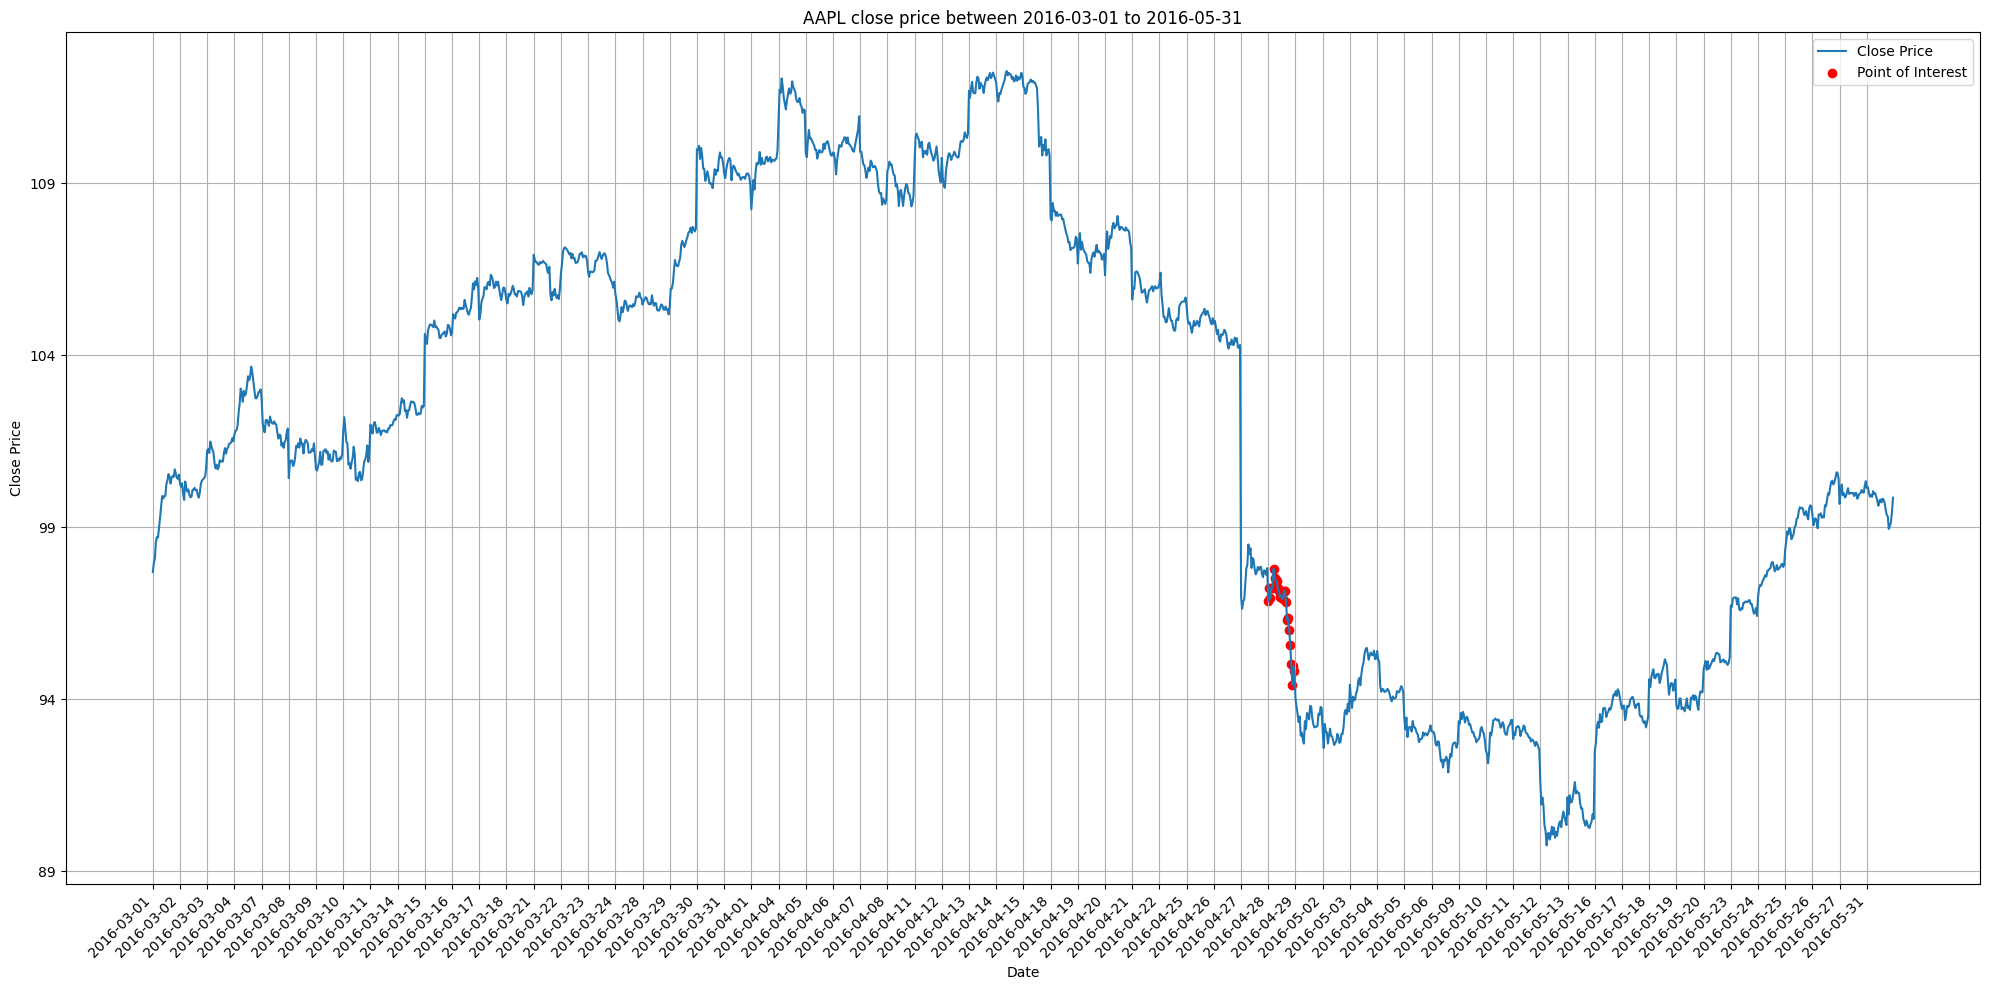

In [18]:
graphTester("AAPL", "15min", "2016-04-28")